### Analyse Exploratoire des Données - EDA (Titanic)

- L'EDA est appliquée pour étudier les données et résumer les informations clés.
- Il vous donnera une compréhension de base de vos données, de leur distribution, des valeurs nulles et bien plus encore.
- Vous pouvez explorer les données à l'aide de graphiques ou via certaines fonctions python.
- Il y aura deux types d'analyse. Univarié et Bivarié. Dans l'univarié, vous analyserez un seul attribut. Mais dans le bivarié, vous analyserez un attribut avec l'attribut cible.
- Dans l'approche non graphique, vous utiliserez des fonctions telles que forme, résumé, description, isnull, info, types de données, etc.
- Dans l'approche graphique, vous utiliserez des diagrammes tels que des diagrammes de dispersion, de boîte, de barre, de densité et de corrélation.

#### Charger les données - Load the Data
Nous allons charger le jeu de données titanic en python pour effectuer l'EDA.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss, classification_report

#Load the data
df = pd.read_csv('titanic.csv')

#View the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Description des attribus
- Pclass Classe ou la personne est assisse (1 = 1st; 2 = 2nd; 3 = 3rd)
- survival Survival(label) (0 = No; 1 = Yes)
- name Nom
- sex Sexe
- age Age
- sibsp Number of Siblings/Spouses Aboard (Nombre de freres et soeurs)
- parch Number of Parents/Children Aboard (Nombre de parents/enfants)
- ticket Ticket Number(Le numero du ticket)
- fare Passenger Fare (British pound) (Le prix du ticket)
- cabin Cabin
- embarked Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton) (Le port d' embarkation)

1. Informations de base sur les données - EDA

La fonction df.info() nous donnera les informations de base sur les données. Pour toute donnée, il est bon de commencer par connaître ses informations. Voyons comment cela fonctionne avec nos données.
À l'aide de cette fonction, vous pouvez voir le nombre de valeurs nulles, de types de données et d'utilisation de la mémoire, comme indiqué dans les sorties ci-dessus, ainsi que des statistiques descriptives.

In [2]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#Describe the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#Pour connaitre la structure des donnees
df.shape

(891, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Valeurs dupliquées

Vous pouvez utiliser la fonction df.duplicate.sum() pour la somme des valeurs en double présentes, le cas échéant. Il affichera le nombre de valeurs en double si elles sont présentes dans les données.

In [6]:
df.duplicated().sum()

0

Eh bien, la fonction a renvoyé '0'. Cela signifie qu'il n'y a pas une seule valeur en double dans notre jeu de données et c'est une très bonne chose à savoir.

3. Valeurs uniques dans les données

In [7]:
#Vous pouvez trouver le nombre de valeurs uniques dans la colonne particulière en utilisant la fonction unique() en python.
#unique values

print(df['Embarked'].unique())

print(df['Survived'].unique())

print(df['Sex'].unique())

['S' 'C' 'Q' nan]
[0 1]
['male' 'female']


In [8]:
#Pour voir le nombre de uniques values pour tous les parameters
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

4. Visualisez les valeurs uniques

In [9]:
#Nous pouvons utiliser value_counts() pour le nombre de chaque valeur pour chaque classe
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

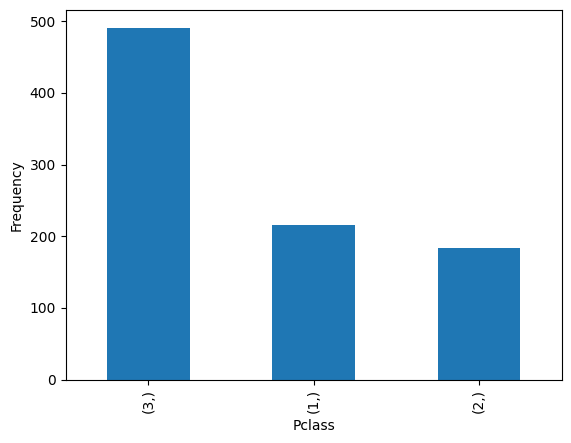

In [10]:
df[['Pclass']].value_counts().plot(kind="bar")
plt.ylabel('Frequency')

5. Trouvez les valeurs nulles

Trouver les valeurs nulles est l'étape la plus importante de l'EDA. Il est primordial d'assurer la qualité des données. Voyons donc comment trouver les valeurs nulles.

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#Supprimer cabin parceque il y a beaucoup de nulls, 77% des valeurs sont nulls
df.drop('Cabin', axis=1, inplace=True)

In [13]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

In [14]:
df.shape

(891, 11)

6. Remplacez les valeurs nulles

In [15]:
na_remplace = df.replace(np.nan,0,inplace = False)
na_remplace.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Parfois, cela n'a pas de sens de remplacer les valeurs nulles par 0, pour l'âge par exemple, nous pouvons remplacer par la moyenne

In [16]:
np.mean(df['Age'])

29.69911764705882

In [17]:
df['Age'] = df['Age'].replace(np.nan, int(np.mean(df['Age'])))

In [18]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

On peut utiliser mode pour les parametres qui ne sont pas numeriques. Le mode est la valeur qui apparaît le plus souvent dans un ensemble de valeurs de données.

In [19]:
#Cabin a ete deja supprimer
#df['Cabin'].mode()

In [20]:
#df['Cabin'] = df['Cabin'].replace(np.nan, np.max(df['Cabin'].mode()))

In [21]:
#df['Cabin'].isnull().sum()

In [22]:
df['Embarked'] = df['Embarked'].replace(np.nan, np.max(df['Embarked'].mode()))

In [23]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

7. Connaître les types de données

In [24]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

8. Filtrer les données

In [25]:
df[(df['Survived']==1) & (df['Sex']=='male') & (df['Age']>=60) ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


9. Un diagramme en boîte

<Axes: >

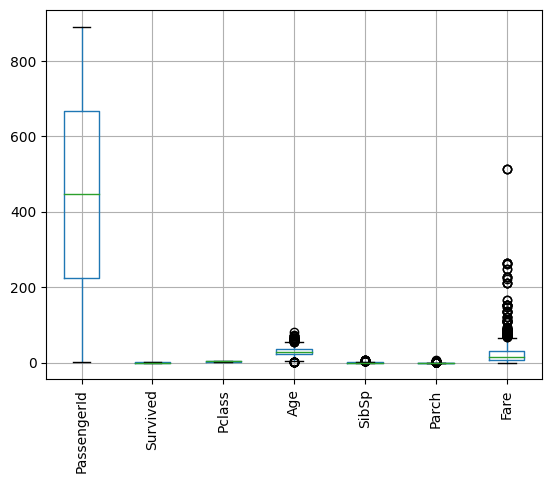

In [26]:
df.boxplot(rot=90)

In [27]:
df['Fare'].dtypes

dtype('float64')

<Axes: >

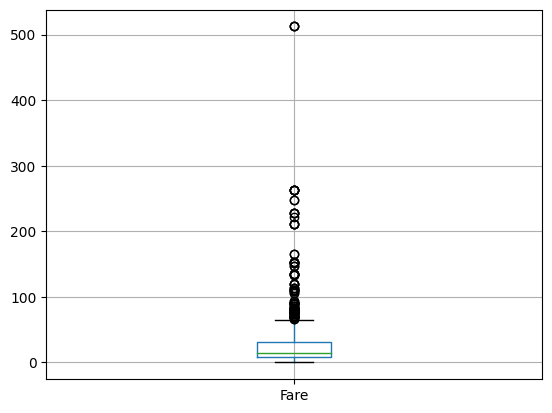

In [28]:
df[['Fare']].boxplot()

10. Corrélation entre les paramètres

In [29]:
df.corr()

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

Il s'agit de la matrice de corrélation avec la plage de +1 à -1 où +1 est fortement et positivement corrélé et -1 sera fortement corrélé négativement.

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#On peut aussi utiliser:
sns.pairplot(df)

# Logistic Regression

In [30]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [31]:
# Remplacer les valueurs non-numeriques
dummies = ['Sex', 'Embarked']
dummy_data = pd.get_dummies(df[dummies])

In [32]:
dummy_data

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,False,True,False,False,True
1,True,False,True,False,False
2,True,False,False,False,True
3,True,False,False,False,True
4,False,True,False,False,True
...,...,...,...,...,...
886,False,True,False,False,True
887,True,False,False,False,True
888,True,False,False,False,True
889,False,True,True,False,False


In [35]:
predictors = pd.concat([df[['Pclass', 'Age', 'SibSp', 'Parch']], dummy_data], axis=1)

In [36]:
predictors.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,False,True,False,False,True
1,1,38.0,1,0,True,False,True,False,False
2,3,26.0,0,0,True,False,False,False,True
3,1,35.0,1,0,True,False,False,False,True
4,3,35.0,0,0,False,True,False,False,True


In [37]:
label = df[['Survived']]

In [38]:
label.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [39]:
x_train, x_test, y_train, y_test = train_test_split(predictors, label, test_size = 0.3, random_state = 0)

log_reg = LogisticRegression()

In [40]:
log_reg.fit(x_train, y_train)

/home/gobi/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/gobi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1])

In [42]:
accuracy_score(y_pred, y_test)

0.7910447761194029

In [43]:
confusion_matrix(y_pred, y_test)

array([[140,  28],
       [ 28,  72]])

<Axes: >

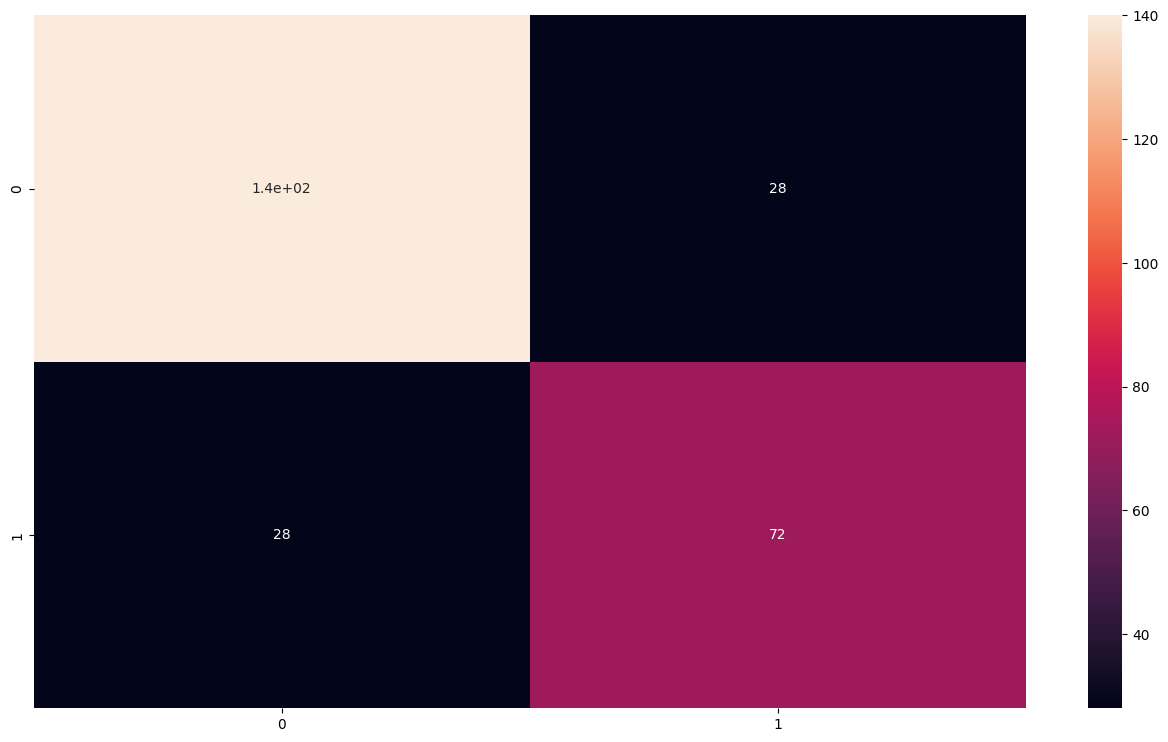

In [44]:
matrix = confusion_matrix(y_pred, y_test)
plt.figure(figsize=(16, 9))
ax= plt.subplot()
sns.heatmap(matrix, annot=True)

In [45]:
rapport = classification_report(y_pred, y_test)

print(rapport)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       168
           1       0.72      0.72      0.72       100

    accuracy                           0.79       268
   macro avg       0.78      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268



In [46]:
log_loss(y_pred, y_test)

7.531509663397614

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_pred, y_test)

In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn_classifier.fit(x_train, y_train)


In [ ]:
y_pred = knn_classifier.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)